In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [5]:
# load the data
medical_insurance_data = pd.read_csv('c:/Users/91997/Downloads/medical_insurance.csv')

medical_insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#checking null values in the dataset

medical_insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#statistical measures of the dataset

medical_insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# remove duplicates 

medical_insurance_data.drop_duplicates().head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Separating independent variables (features) and dependent variable (target)

X = medical_insurance_data.drop('charges', axis=1)
y = medical_insurance_data['charges']

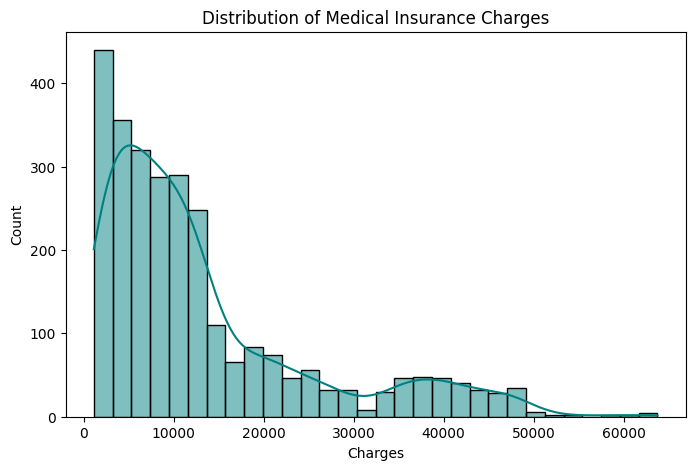

In [10]:
# What is the distribution of medical insurance charges?
plt.figure(figsize=(8,5))
sns.histplot(medical_insurance_data['charges'], kde=True, bins=30, color='teal')
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

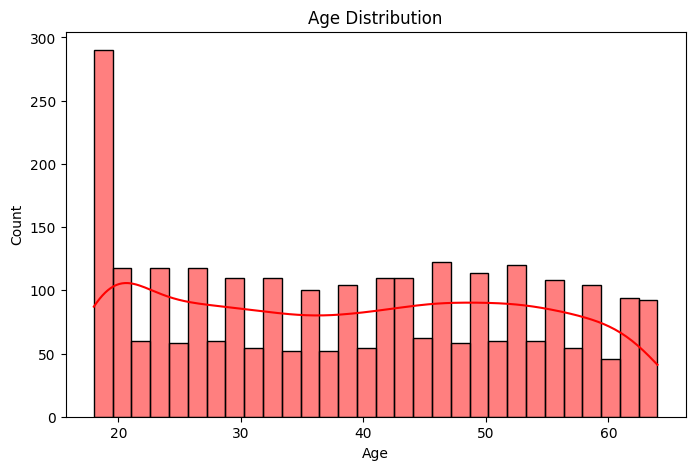

In [11]:
#What is the age distribution of the individuals?
plt.figure(figsize=(8,5))
sns.histplot(medical_insurance_data['age'], kde=True, bins=30, color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

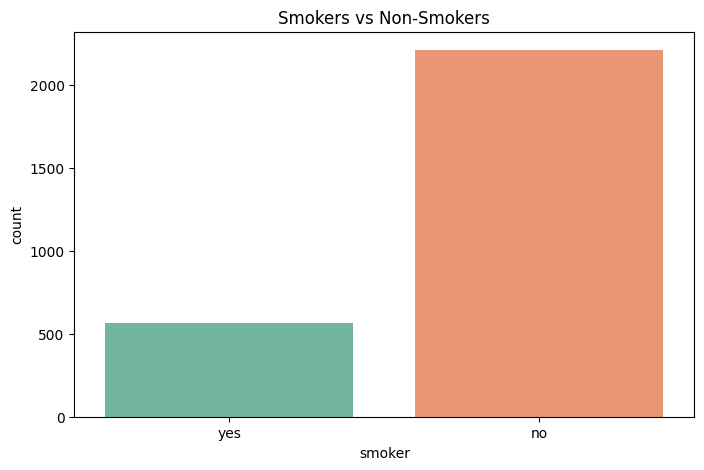

In [12]:
#How many people are smokers vs non-smokers?
plt.figure(figsize=(8,5))
sns.countplot(x='smoker', data=medical_insurance_data , palette='Set2')
plt.title("Smokers vs Non-Smokers")
plt.show()

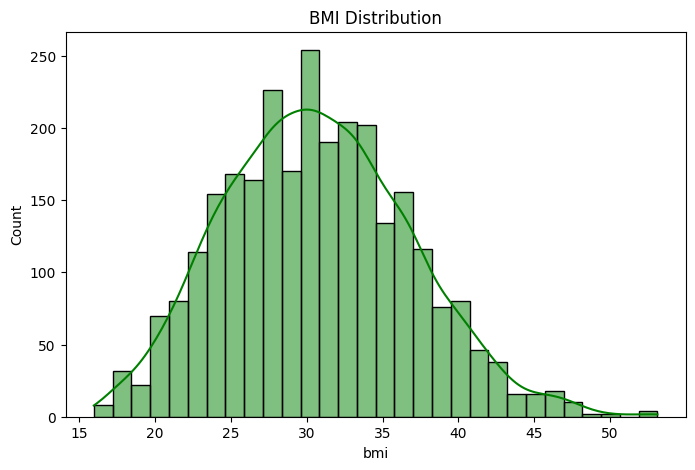

In [ ]:
#What is the average BMI in the dataset?
plt.figure(figsize=(8,5))
sns.histplot(medical_insurance_data['bmi'], kde=True, bins=30, color='green')
plt.title("BMI Distribution")
plt.show()

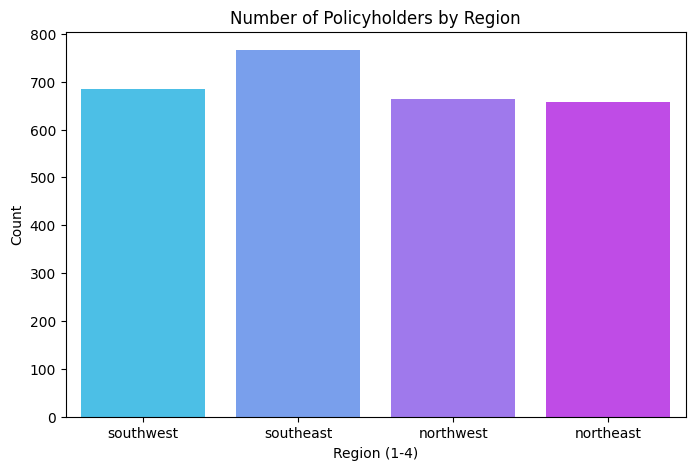

In [14]:
#Which regions have the most number of policyholders?
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=medical_insurance_data, palette='cool')
plt.title("Number of Policyholders by Region")
plt.xlabel("Region (1-4)")
plt.ylabel("Count")
plt.show()

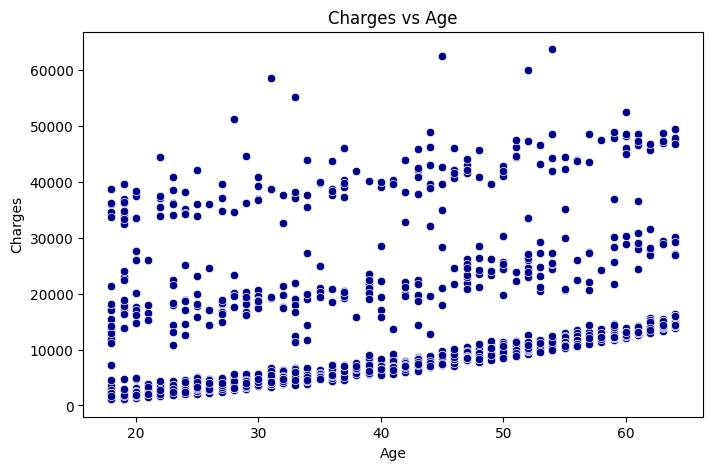

In [15]:
# How do charges vary with age?
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'age', y='charges', data=medical_insurance_data, color='darkblue')
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

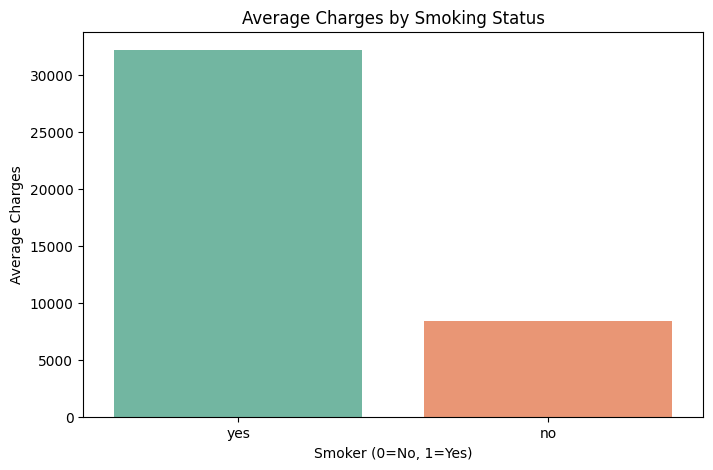

In [16]:
# Is there a difference in average charges between smokers and non-smokers?
plt.figure(figsize=(8,5))
sns.barplot(x='smoker', y='charges', data=medical_insurance_data, ci=None, palette="Set2")
plt.title("Average Charges by Smoking Status")
plt.xlabel("Smoker (0=No, 1=Yes)")
plt.ylabel("Average Charges")
plt.show()

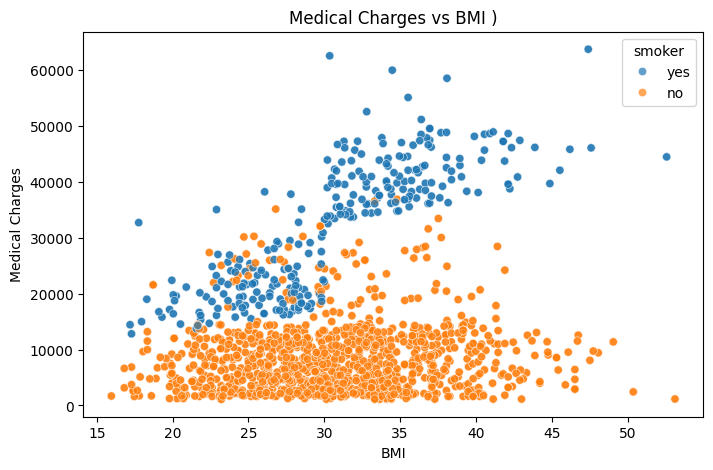

In [17]:
# Does BMI impact insurance charges?
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=medical_insurance_data, hue='smoker', alpha=0.7)
plt.title("Medical Charges vs BMI )")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.show()

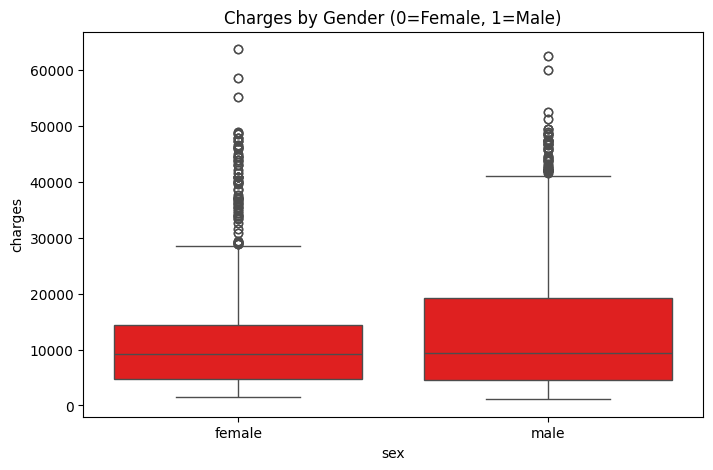

In [18]:
# Do men or women pay more on average?
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='charges', data=medical_insurance_data, color ='red')
plt.title("Charges by Gender (0=Female, 1=Male)")
plt.show()

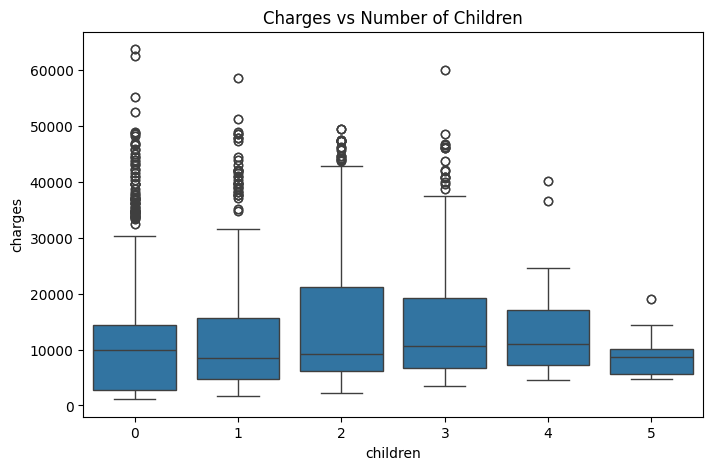

In [19]:
# Is there a correlation between the number of children and the insurance charges?
plt.figure(figsize=(8,5))
sns.boxplot(x='children', y='charges', data=medical_insurance_data)
plt.title("Charges vs Number of Children")
plt.show()

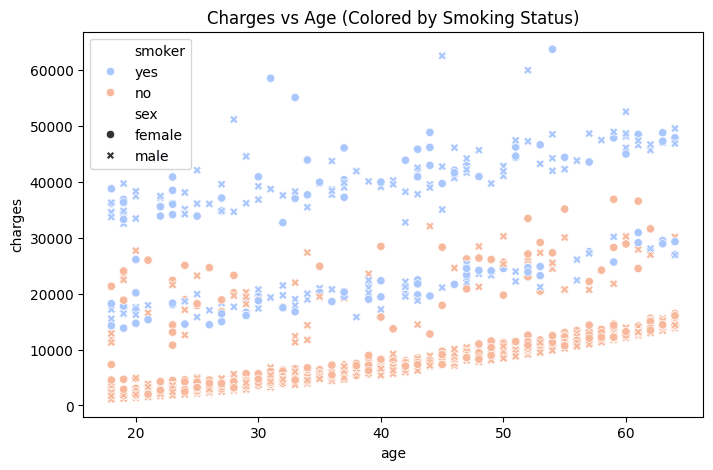

In [20]:
# How does smoking status combined with age affect medical charges?
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', data=medical_insurance_data, palette='coolwarm')
plt.title("Charges vs Age (Colored by Smoking Status)")
plt.show()

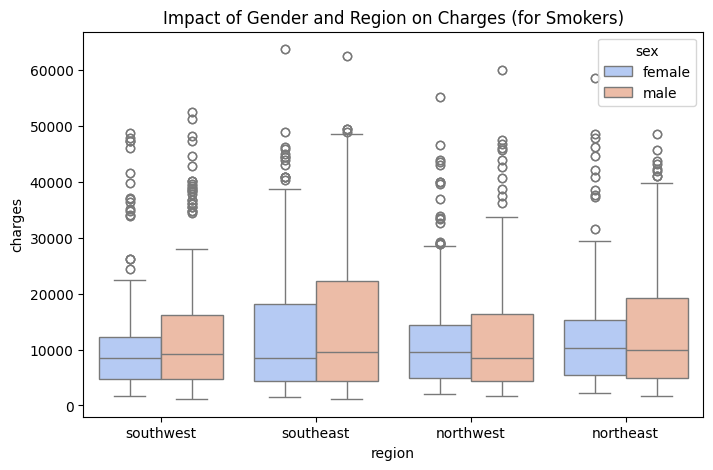

In [21]:
# What is the impact of gender and region on charges for smokers?
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', hue='sex', data=medical_insurance_data, palette="coolwarm")
plt.title("Impact of Gender and Region on Charges (for Smokers)")
plt.show()

Text(0.5, 1.0, 'Age vs Charges ')

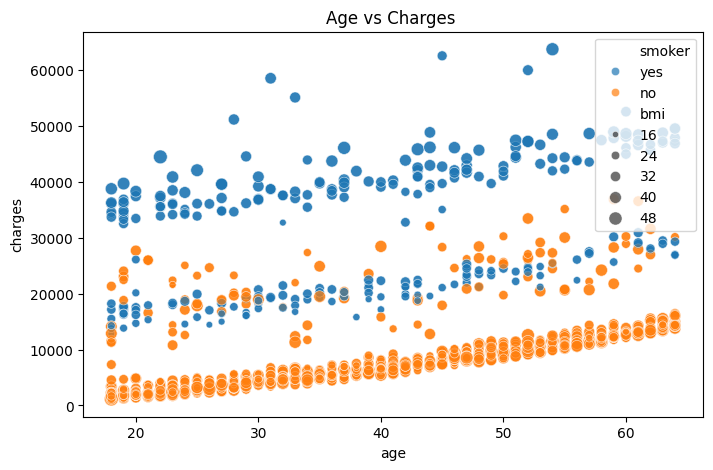

In [22]:
# How do age, BMI, and smoking status together affect insurance cost?
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=medical_insurance_data,
    x='age',
    y='charges',
    size='bmi',
    hue='smoker',
    alpha=0.7,
    sizes=(20,100)
   
)
plt.title("Age vs Charges ")


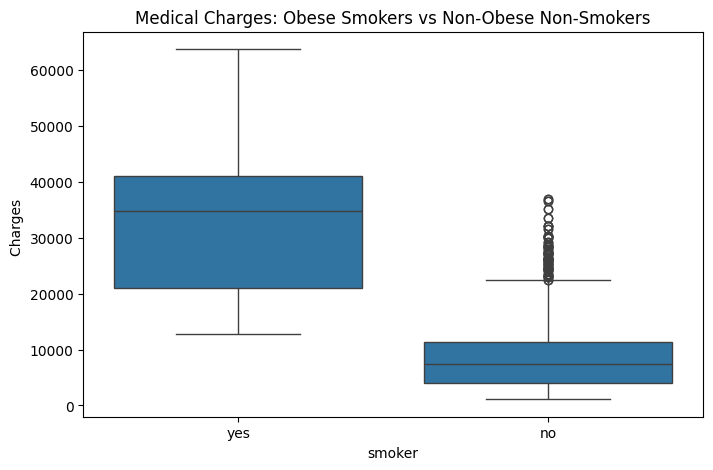

In [23]:
# Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=medical_insurance_data)
plt.title('Medical Charges: Obese Smokers vs Non-Obese Non-Smokers')
plt.ylabel('Charges ')
plt.xlabel('smoker')
plt.show()

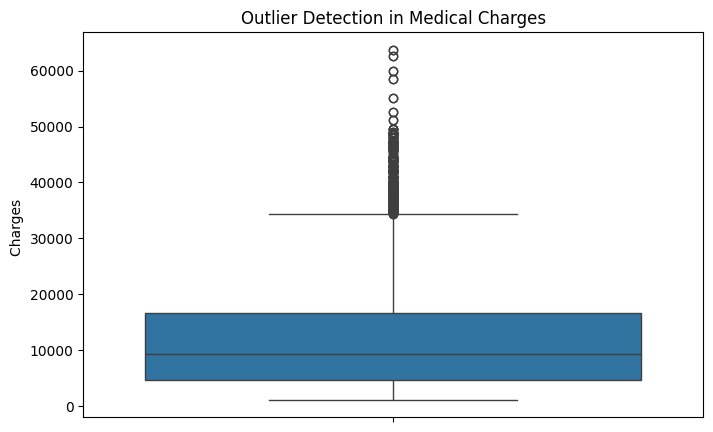

In [24]:
# Are there outliers in the charges column? Who are the individuals paying the highest costs?
plt.figure(figsize=(8,5))
sns.boxplot(y='charges', data=medical_insurance_data)
plt.title('Outlier Detection in Medical Charges')
plt.ylabel('Charges ')
plt.show()


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


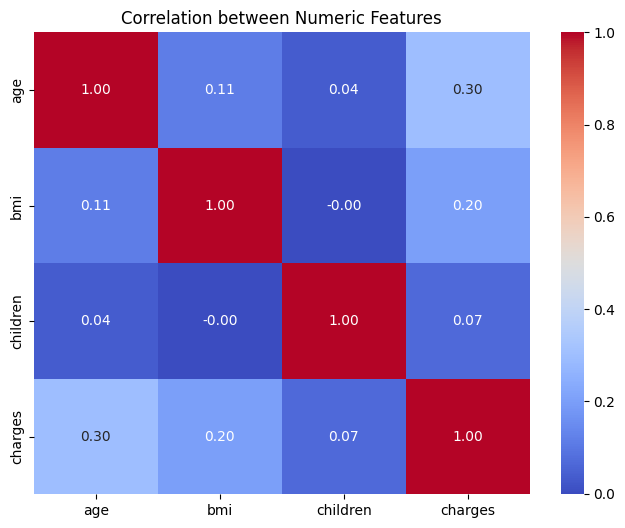

In [25]:
# What is the correlation between numeric features like age, BMI, number of children, and charges?
numeric_features = ['age', 'bmi', 'children', 'charges']

corr_matrix = medical_insurance_data[numeric_features].corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numeric Features')
plt.show()

charges     1.000000
age         0.298624
bmi         0.199846
children    0.066442
Name: charges, dtype: float64


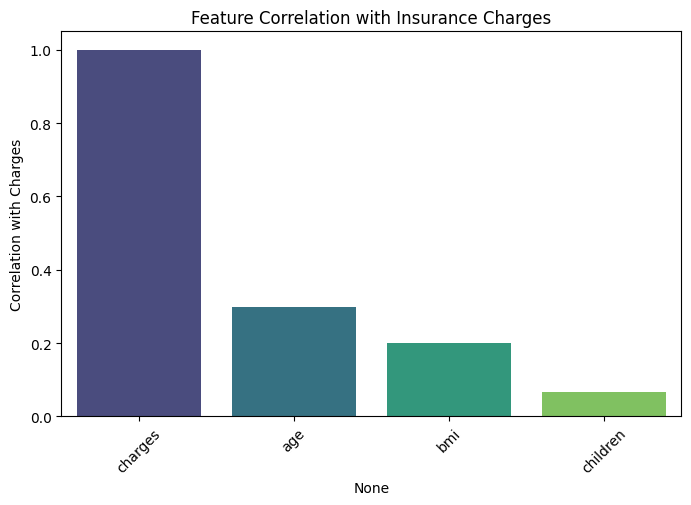

In [26]:
# Which features have the strongest correlation with the target variable (charges)? 

corr = medical_insurance_data.corr(numeric_only=True)['charges'].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(8,5))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Correlation with Charges')
plt.title('Feature Correlation with Insurance Charges')
plt.show()

In [27]:


# 1️⃣ Encode binary columns: 'sex' and 'smoker'
medical_insurance_data['sex'] = medical_insurance_data['sex'].map({'male': 1, 'female': 0})
medical_insurance_data['smoker'] = medical_insurance_data['smoker'].map({'yes': 1, 'no': 0})

# 2️⃣ One-hot encode multi-category column: 'region'
medical_insurance_data = pd.get_dummies(medical_insurance_data, columns=['region'], drop_first=True)




In [28]:
medical_insurance_data 

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,8569.86180,False,True,False
2768,21,0,34.600,0,0,2020.17700,False,False,True
2769,19,1,26.030,1,1,16450.89470,True,False,False
2770,23,1,18.715,0,0,21595.38229,True,False,False


In [29]:
X = medical_insurance_data.drop('charges', axis=1)
y = medical_insurance_data['charges']


In [30]:
#model building

def model_builder(model, X, y):
    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate with regression metrics
    rmse = mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"Model: {type(model).__name__}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-"*40)
    
    return model, mse, mae, r2, rmse

In [31]:
model_builder(DecisionTreeRegressor(), X, y)

Model: DecisionTreeRegressor
RMSE: 7921889.18
MSE: 7921889.18
MAE: 607.98
R² Score: 0.95
----------------------------------------


(DecisionTreeRegressor(),
 7921889.175785132,
 607.9846421045046,
 0.9483851982581976,
 7921889.175785132)

In [32]:
model_builder(LinearRegression(), X, y)

Model: LinearRegression
RMSE: 39933194.55
MSE: 39933194.55
MAE: 4160.25
R² Score: 0.74
----------------------------------------


(LinearRegression(),
 39933194.54805147,
 4160.247974762991,
 0.73981661775643,
 39933194.54805147)

In [33]:
model_builder(RandomForestRegressor(), X, y)

Model: RandomForestRegressor
RMSE: 7644237.03
MSE: 7644237.03
MAE: 1310.67
R² Score: 0.95
----------------------------------------


(RandomForestRegressor(),
 7644237.0274387775,
 1310.6704840746854,
 0.9501942314663228,
 7644237.0274387775)

In [34]:
model_builder(GradientBoostingRegressor(), X, y)

Model: GradientBoostingRegressor
RMSE: 19231074.26
MSE: 19231074.26
MAE: 2297.46
R² Score: 0.87
----------------------------------------


(GradientBoostingRegressor(),
 19231074.259956274,
 2297.4584773536644,
 0.8747005842692634,
 19231074.259956274)

In [35]:
model_builder(XGBRegressor(), X, y)

Model: XGBRegressor
RMSE: 6988647.68
MSE: 6988647.68
MAE: 1202.71
R² Score: 0.95
----------------------------------------


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...),
 6988647.68029895,
 1202.7146426490358,
 0.9544657017464288,
 6988647.68029895)